# Group 13 Final Report

## 1) Data Source: 
#### The data source that we used for our semester project is boxofficemojo.com. This website shows the rankings of movies based on the gross income of domestic box offices. We used the top 15 movies from years 1990 to 2019 to retrieve the data about movie rankings, gross income, and number of theaters to create our visualizations and complete the analysis.

## 2) Description of Crawler and Parser
#### To begin gathering the data, we needed to download  the html pages that have the rankings of top movies from 1990 to 2019. This was done by using the requents library in python. Since the URL of the page is 'https://www.boxofficemojo.com/year/'*insert_year*'/', we were able to write a script that automatically changes the year and appends it to the URL and download the specific HTML script and save it in a folder titled "MOVIES".
#### Once the HTML pages were downloaded, we used BeautifulSoup to parse through them and scrape the data that was between the "table" tags (with the specific ID's containing the data we needed) on each page. Before doing so, we decided to use three variables: the ranking of the movies, the grossing, and the number of theaters that the movies were played in. To do this, we designed a parser that enters the "MOVIES" folder, goes through the HTML page for each year, takes all of the variables listed above, and appends them to separate lists. For this parser to run, all we would need to enter is the year to start with, and the folder containing the HTML scripts.


### Import libraries needed

In [3]:
from bs4 import BeautifulSoup
# stdlib imports
import requests
import statistics as stat
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from urllib.request import Request, urlopen
import time
import random

### Get HTML pages from boxofficemojo.com and place in folder "MOVIES"

In [4]:
for y in range (1977, 2020, 1):
    
    tmp = random.random()*5.0
    print ('Sleep for ', tmp, ' seconds')
    time.sleep(tmp)

    url = 'https://www.boxofficemojo.com/year/'+ str(y) + '/'
    print ('Download from :', url)
    
    #dowlnload
    req = Request(url, headers={'User-Agent': 'Mozilla/5.0'})
    html = urlopen(req).read()



    fileout = 'MOVIES/'+str(y)+'.html'
    print ('Save to : ', fileout, '\n')

    #save file to disk
    f = open(fileout,'w')
    f.write(html.decode('utf-8'))
    f.close()

Sleep for  2.9126756550052635  seconds
Download from : https://www.boxofficemojo.com/year/1977/
Save to :  MOVIES/1977.html 

Sleep for  0.08682757464592128  seconds
Download from : https://www.boxofficemojo.com/year/1978/
Save to :  MOVIES/1978.html 

Sleep for  3.437805629588857  seconds
Download from : https://www.boxofficemojo.com/year/1979/
Save to :  MOVIES/1979.html 

Sleep for  3.5143072637575306  seconds
Download from : https://www.boxofficemojo.com/year/1980/
Save to :  MOVIES/1980.html 

Sleep for  0.4660858279313529  seconds
Download from : https://www.boxofficemojo.com/year/1981/
Save to :  MOVIES/1981.html 

Sleep for  0.5099750466802089  seconds
Download from : https://www.boxofficemojo.com/year/1982/
Save to :  MOVIES/1982.html 

Sleep for  3.9767720153936796  seconds
Download from : https://www.boxofficemojo.com/year/1983/
Save to :  MOVIES/1983.html 

Sleep for  4.849845552408726  seconds
Download from : https://www.boxofficemojo.com/year/1984/
Save to :  MOVIES/1984.

### Get data from the html pages

In [5]:
movie_data = list()
avggross =list()
avgofranks = list()
avgoftheaters = list()
lstofgross = list()
lstoftheater = list()
grosstbl = list()
theatertbl = list()

def full_parser(year):
    
    while year < 2020:
        print("Beginning process for ", year, "data")
        html_doc = open('MOVIES/'+str(year)+'.html','r').read()

        # Parse html content using BeautifulSoup
        soup = BeautifulSoup(html_doc, 'lxml')
        
        #identify table
        tbl1 = soup.find(id='table')
        
        #get movie titles
        print("getting titles and number of theaters")
        title=tbl1.find_all('td', attrs={'class': 'a-text-left mojo-field-type-release mojo-cell-wide'})
        
        #loop to find the gross amount (not total gross), and convert string to int
        print("getting gross")
        gross = tbl1.find_all('td',attrs={'class': 'a-text-right mojo-field-type-money mojo-estimatable'})
        count = 0
        k = 0
        templst = []
        #average of the gross for every year (there should be 30 numbers in the end)
        tempavg = 0
        #average of the gross by rank. There should be 15 at the end (1 for each rank)
        rankavg = 0
        while count < 15:
            gross_int = gross[k].get_text()
            gross_int = gross_int.replace("$","")
            gross_int = gross_int.replace(",","")
            grosstbl.append(int(gross_int))
            templst.append(int(gross_int))
            k +=2
            count +=1
        #print(templst)
        lstofgross.append(templst)
        tempavg = stat.mean(templst)
        avggross.append(tempavg)
        
            
        #loop to find the number of theaters, convert theater numbers from string to int
        print("getting number of theaters")
        theaters = tbl1.find_all('td',attrs={'class': 'a-text-right mojo-field-type-positive_integer'})
        
        theatertmplst = list()
        count = 0
        k = 0
        while count < 15:
            theater_int = theaters[k].get_text()
            theater_int = theater_int.replace(",","")
            theatertbl.append(int(theater_int))
            theatertmplst.append(int(theater_int))
            k+=1
            count+=1
        lstoftheater.append(theatertmplst)
        
        #add data of the first fifteen movies from every year
        print("adding data to list")
        counter = 0 
        k = 0    
        
        while counter < 15:
            name = title[k].get_text()
            totalgross = grosstbl[k]
            noOftheaters = theatertbl[k]
            movie_data.append((name,totalgross,noOftheaters))
            k+=1
            counter +=1
        
        #move to next year
        print()
        year += 1
    print()
    print("Done!")

## Calling the function full_parser. For the assignment, we are working with the data from the last 30 years

In [6]:
full_parser(1990)

Beginning process for  1990 data
getting titles and number of theaters
getting gross
getting number of theaters
adding data to list

Beginning process for  1991 data
getting titles and number of theaters
getting gross
getting number of theaters
adding data to list

Beginning process for  1992 data
getting titles and number of theaters
getting gross
getting number of theaters
adding data to list

Beginning process for  1993 data
getting titles and number of theaters
getting gross
getting number of theaters
adding data to list

Beginning process for  1994 data
getting titles and number of theaters
getting gross
getting number of theaters
adding data to list

Beginning process for  1995 data
getting titles and number of theaters
getting gross
getting number of theaters
adding data to list

Beginning process for  1996 data
getting titles and number of theaters
getting gross
getting number of theaters
adding data to list

Beginning process for  1997 data
getting titles and number of theater

## Data extracted

In [30]:
# for i in movie_data:
#     print(i)
#print (avggross)

## Perform linear regression on average gross over 30 years and time

alpha :  -15458418759.56394
beta :  7814090.445324434
correlation coefficient :  0.962654579155943


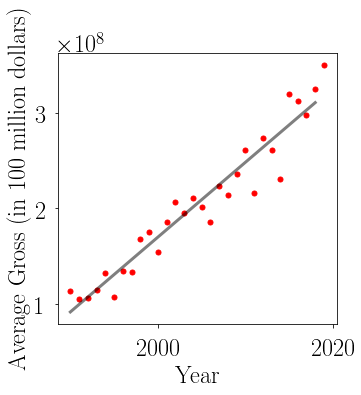

In [7]:
years = np.arange(1990, 2020, 1)

plt.figure(figsize=(5,5))
plt.rc('text', usetex=True)
plt.rc('font', size=24, **{'family':'DejaVu Sans','sans-serif':['Helvetica']})
plt.rcParams['xtick.major.pad'] = 8
plt.rcParams['ytick.major.pad'] = 8

plt.plot(years,avggross, marker='o', color ='r', markersize=5, linewidth=0)


slope, intercept, r_value, p_value, std_err = stats.linregress(years,avggross)
print ('alpha : ', intercept)
print ('beta : ', slope)
print ('correlation coefficient : ', r_value)



best_fit_x = np.arange(min(years), max(years), 1)
best_fit_y = intercept + slope * best_fit_x
plt.plot(best_fit_x, best_fit_y, color ='k', markersize=0, linewidth=3, linestyle='-', alpha = 0.5)


plt.xlabel('Year')
plt.ylabel('Average Gross (in 100 million dollars)')



plt.show()

#### The above graph displays movie data from a span of 30 years (1990 to 2020). The x-axis is Year and the y-axis is the average gross (in 100 millions) of the top ranking movies during each year. Each of the points on the graph represent the average gross amount for the top 15 movies of that year (1 data point = 15 movies). Based on the visualization and the correlation coefficient, we can interpret that there is overall a positive correlation between the two variables. This can highlight the overall film industry growth over the last 30 years. 

## Further extract data. 
#### get a list of the average gross of every rank
#### get a list of the average number of theaters for every rank
#### There are 15 for each

In [8]:
rank1 = []
for i in lstofgross:
        rank1.append(i[0])
avg1 = stat.mean(rank1)

rank2 = []
for i in lstofgross:
        rank2.append(i[1])
avg2 = stat.mean(rank2)
rank3 = []
for i in lstofgross:
        rank3.append(i[2])
avg3 = stat.mean(rank3)
rank4 = []
for i in lstofgross:
        rank4.append(i[3])
avg4 = stat.mean(rank4)
rank5 = []
for i in lstofgross:
        rank5.append(i[4])
avg5 = stat.mean(rank5)
rank6 = []
for i in lstofgross:
        rank6.append(i[5])
avg6 = stat.mean(rank6)
rank7 = []
for i in lstofgross:
        rank7.append(i[6])
avg7 = stat.mean(rank7)
rank8 = []
for i in lstofgross:
        rank8.append(i[7])
avg8 = stat.mean(rank8)
rank9 = []
for i in lstofgross:
        rank9.append(i[8])
avg9 = stat.mean(rank9)
rank10 = []
for i in lstofgross:
        rank10.append(i[9])
avg10 = stat.mean(rank10)
rank11 = []
for i in lstofgross:
        rank11.append(i[10])
avg11 = stat.mean(rank11)
rank12 = []
for i in lstofgross:
        rank12.append(i[11])
avg12 = stat.mean(rank12)
rank13 = []
for i in lstofgross:
        rank13.append(i[12])
avg13 = stat.mean(rank13)
rank14 = []
for i in lstofgross:
        rank14.append(i[13])
avg14 = stat.mean(rank14)
rank15 = []
for i in lstofgross:
        rank15.append(i[14])
avg15 = stat.mean(rank15)

all_avgs = [avg1,avg2,avg3,avg4,avg5,avg6,avg7,avg8,avg9,avg10,avg11,avg12,avg13,avg14,avg15]

theater1 = []
for i in lstoftheater:
        theater1.append(i[0])
avgtheater1 = stat.mean(theater1)

theater2 = []
for i in lstoftheater:
        theater2.append(i[1])
avgtheater2 = stat.mean(theater2)

theater3 = []
for i in lstoftheater:
        theater3.append(i[2])
avgtheater3 = stat.mean(theater3)
theater4 = []
for i in lstoftheater:
        theater4.append(i[3])
avgtheater4 = stat.mean(theater4)
theater5 = []
for i in lstoftheater:
        theater5.append(i[4])
avgtheater5 = stat.mean(theater5)
theater6 = []
for i in lstoftheater:
        theater6.append(i[5])
avgtheater6 = stat.mean(theater6)
theater7 = []
for i in lstoftheater:
        theater7.append(i[6])
avgtheater7 = stat.mean(theater7)
theater8 = []
for i in lstoftheater:
        theater8.append(i[7])
avgtheater8 = stat.mean(theater8)
theater9 = []
for i in lstoftheater:
        theater9.append(i[8])
avgtheater9 = stat.mean(theater9)
theater10 = []
for i in lstoftheater:
        theater10.append(i[9])
avgtheater10 = stat.mean(theater10)
theater11 = []
for i in lstoftheater:
        theater11.append(i[10])
avgtheater11 = stat.mean(theater11)
theater12 = []
for i in lstoftheater:
        theater12.append(i[11])
avgtheater12 = stat.mean(theater12)
theater13 = []
for i in lstoftheater:
        theater13.append(i[12])
avgtheater13 = stat.mean(theater13)
theater14 = []
for i in lstoftheater:
        theater14.append(i[13])
avgtheater14 = stat.mean(theater14)
theater15 = []
for i in lstoftheater:
        theater15.append(i[14])
avgtheater15 = stat.mean(theater15)

all_avg_theaters = [avgtheater1,avgtheater2,avgtheater3,avgtheater4,avgtheater5,avgtheater6,avgtheater7,avgtheater8,avgtheater9,avgtheater10,avgtheater11,avgtheater12,avgtheater13,avgtheater14,avgtheater15]
#print(all_avgs)
#print(all_avg_theaters)


### Perform linear regression on average number of theaters the movies were played in, and the gross of movies based on their rankings

alpha :  -1220129420.1263607
beta :  425528.7010590278
correlation coefficient :  0.8858102163199645


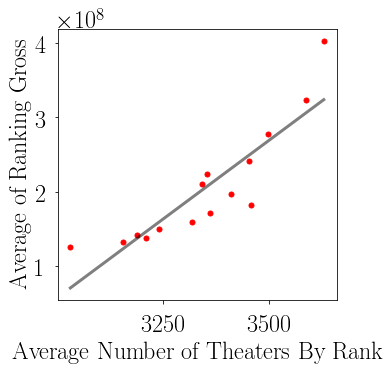

In [9]:
x = all_avg_theaters
y = all_avgs

plt.figure(figsize=(5,5))
plt.rc('text', usetex=True)
plt.rc('font', size=24, **{'family':'DejaVu Sans','sans-serif':['Helvetica']})
plt.rcParams['xtick.major.pad'] = 8
plt.rcParams['ytick.major.pad'] = 8

plt.plot(x,y, marker='o', color ='r', markersize=5, linewidth=0)


slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print ('alpha : ', intercept)
print ('beta : ', slope)
print ('correlation coefficient : ', r_value)



best_fit_x = np.arange(min(x), max(x), 1)
best_fit_y = intercept + slope * best_fit_x
plt.plot(best_fit_x, best_fit_y, color ='k', markersize=0, linewidth=3, linestyle='-', alpha = 0.5)


plt.xlabel('Average Number of Theaters By Rank')
plt.ylabel('Average of Ranking Gross')




plt.show()

#### The above graph utilizes data from a span of 30 years (1990 to 2020). The x-axis is Average Number of Theaters by Rank and the y-axis is Average of Ranking Gross. The purpose of this graph is to take the top-ranked movies of each year in our time window (top 15 movies per year), average the movie rankings of each year, and determine if there is a relationship between the averages and the number of movie theaters. Based on this visualization, we can interpret that there is a positive correlation between the two variables. This shows that the average number of theaters that a movie is played in directly correlates to it's ranking in the top 15 movies.

# Further Analysis
#### In the Histogram, we have the gross income (100 millions) on the x-axis split into 50 bins, and the number of movies that fall into each bin on the y-axis. From this histogram, we can see that the data is skewed to the right. There are a lot of movies in the $100,000,000 - $250,000,000 bins and fewer movies making significantly more money than the rest.

Text(0,0.5,'Number of Movies')

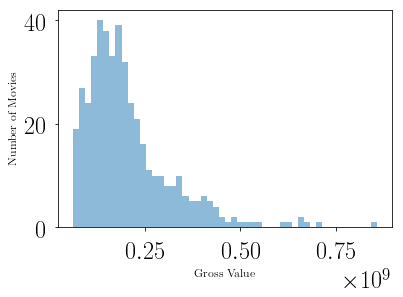

In [10]:

# Histograms can also be plotted similar to barcharts

# Let's create some number at random
x = grosstbl
#for i in range(100):
#    x.append(random.gauss(0,1))

#number of bins you want
mybins = 50
#alpha is transparency
plt.hist(x, bins = mybins, alpha=0.5) # Hist function computes histogram

plt.xlabel('Gross Value', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)


### The box and whisker plot is slightly skewed to the left, opposite of the histogram. A large number of movies in our data set were shown in a large number of theaters, with fewer movies being shown in fewer theaters. 

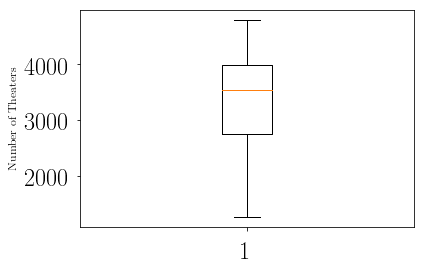

In [11]:
plt.boxplot(theatertbl)
plt.ylabel('Number of Theaters', fontsize=12)
plt.show()

#### The two visuals show that the gross amount that a movie made is skewed right and the number of theaters that the top 15 movies of each year were played in is skewed left. This highlights an inverse relationship between the two. Possible explanations for this include:
#### 1) The standards for outstanding movies drastically increased over time
#### 2) Inflation
#### 3) Most of the top 15 movies are from big production companies

## Summary and Conclusion

#### The first scatterplot from 1990 to 2020 which is the past 30 years. Each of the graphs represent the average gross amount for the two 15 movies of the year. Based on the visualization and the correlation coefficient, we can tell that there is overall a positive correlation between the two variables.
#### The second scatterplot takes the top ranked movies of each year in our time window(top 15 movies per year) . average the movies rankings of each year, determine if there is a relationship between the averages and the number of movies.we can see that there is a positive correlation between the two variables.
#### Compared to those two scatterplot .96 for the first one is very strong, and .88 for the second one is also strong but not strong as the first one. There is a strong positive correlation for both of them.
#### The standard for outstanding movies drastically increased over time, because good movies are getting better. inflation, the values of money is changing and since we looking for the top 15 movies each years, it's going to come for a big production companies
